In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Step 2: Load the gene expression data
data = pd.read_csv('gene_expression_data.csv', sep='\t')

In [8]:
# Step 3: Preprocess the data
gene_names = data['Gene Accession Number']  # Extract gene accession numbers for reference
expression_data = data.iloc[:, 2:]  # Select only the expression data columns

In [9]:
# Step 4: Perform data scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data)

In [10]:
# Step 5: Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace '3' with the desired number of clusters
cluster_labels = kmeans.fit_predict(scaled_data)

/opt/homebrew/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Step 6: Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

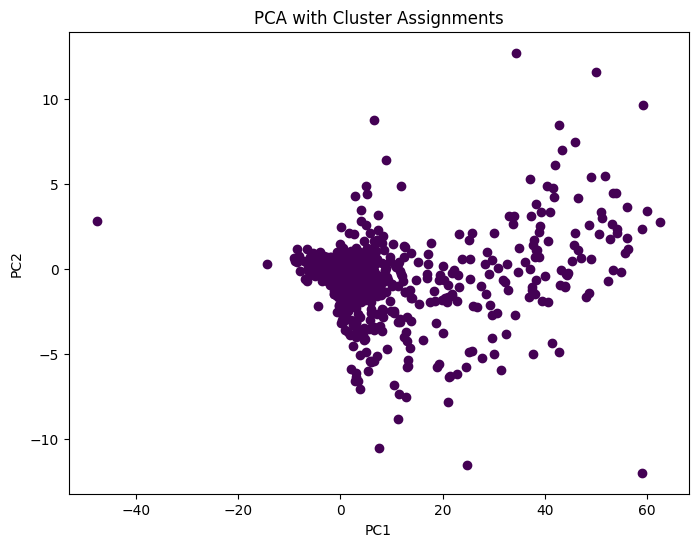

In [12]:
# Step 7: Plot PCA results with cluster assignments
plt.figure(figsize=(8, 6))
for i in range(len(cluster_labels)):
    plt.scatter(pca_data[i, 0], pca_data[i, 1], c=cluster_labels[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Cluster Assignments')
plt.show()

In [13]:
# Step 8: Gene expression profile analysis for each cluster
num_clusters = len(set(cluster_labels))
for cluster_num in range(num_clusters):
    cluster_genes = data.iloc[cluster_labels == cluster_num, 2:]  # Subset genes belonging to the cluster
    cluster_mean_expression = cluster_genes.mean(axis=0)  # Calculate mean expression for each gene
    top_genes = cluster_mean_expression.nlargest(5)  # Select top 5 highly expressed genes
    print(f"\nTop genes for Cluster {cluster_num+1}:")
    print(top_genes)


Top genes for Cluster 1:
20    502.784271
17    381.510838
9     368.115407
36    366.910955
33    337.621558
dtype: float64

Top genes for Cluster 2:
6     17626.803922
10    17558.607843
27    17542.705882
5     17481.264706
11    17458.509804
dtype: float64

Top genes for Cluster 3:
20    8605.055276
9     6962.145729
17    6598.045226
36    6479.231156
30    6407.618090
dtype: float64


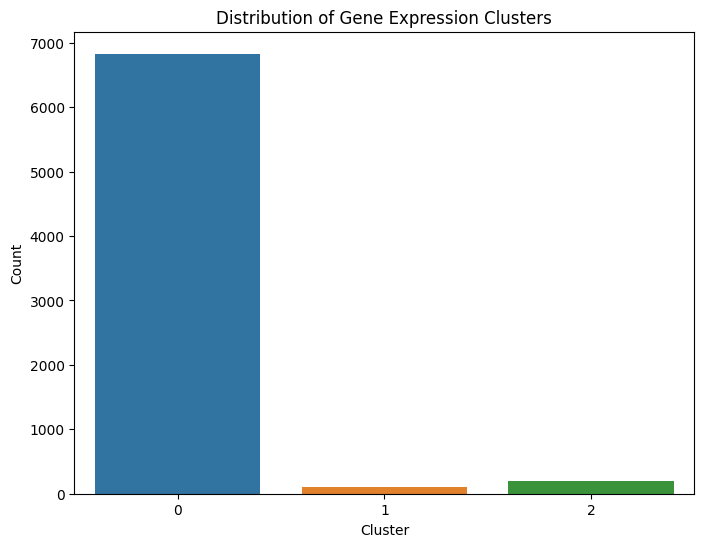

In [14]:
# Plot cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=cluster_labels)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Gene Expression Clusters')
plt.show()

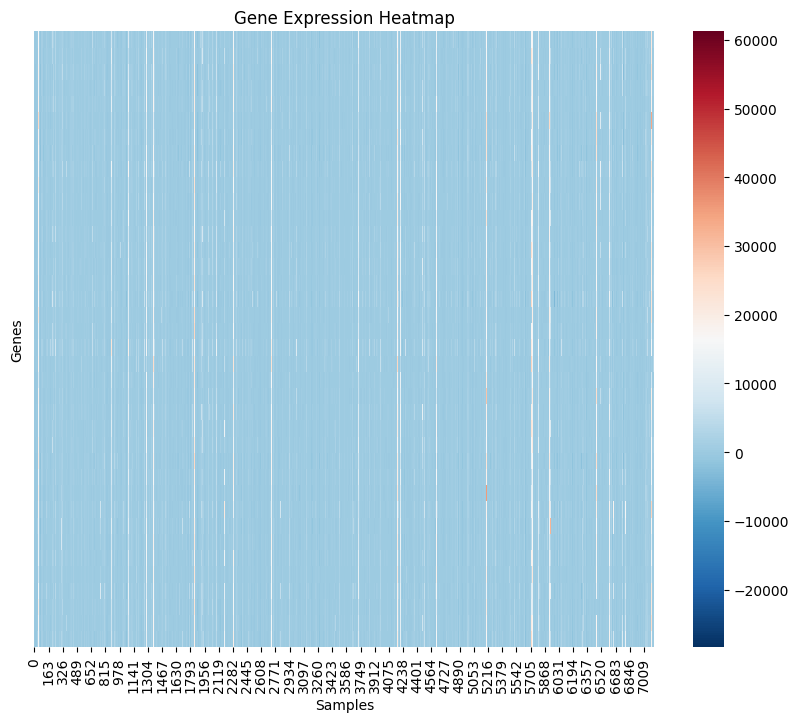

In [15]:
# Heatmap of gene expression profiles within clusters
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, 2:].T, cmap='RdBu_r', yticklabels=False)
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Gene Expression Heatmap')
plt.show()

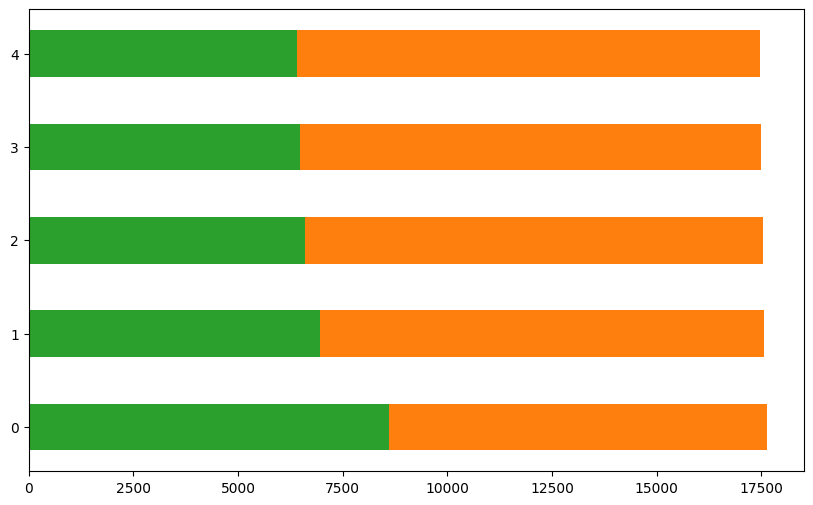

In [16]:
# Bar plot of mean expression for top genes within each cluster
plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_genes = data.iloc[cluster_labels == cluster_num, 2:]  # Subset genes belonging to the cluster
    cluster_mean_expression = cluster_genes.mean(axis=0)  # Calculate mean expression for each gene
    top_genes = cluster_mean_expression.nlargest(5)  # Select top 5 highly expressed genes
    plt.barh(range(len(top_genes)), top_genes, align='center', height=0.5, label=f'Cluster {cluster_num+1}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


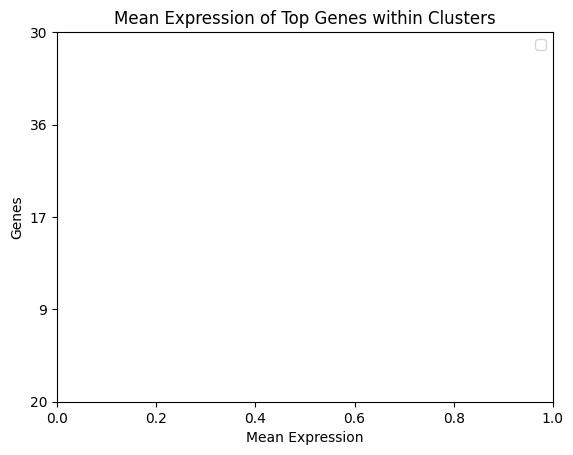

In [17]:
plt.yticks(range(len(top_genes)), top_genes.index)
plt.xlabel('Mean Expression')
plt.ylabel('Genes')
plt.title('Mean Expression of Top Genes within Clusters')
plt.legend()
plt.show()